# Credit Card Fraud Detection
In this assignment, you will be building classification models that are able to recognize fraudulent credit card transactions 
so that customers are not charged for items that they did not purchase. We will use the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset from Kaggle. The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
<br>
If you've never heard of PCA before, here is a quick description from Wikipedia. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components (sound confusing :D). For more information and intuitive explanations about PCA please check the following links:
<br>
[Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
<br>
[What is an intuitive explanation for PCA?](https://www.quora.com/What-is-an-intuitive-explanation-for-PCA)
<br>
[StatQuest: PCA main ideas in only 5 minutes!!!](https://www.youtube.com/watch?v=HMOI_lkzW08)
<br>
[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
<br>
[StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ)
<br>
Because the dataset for this assignment is highly unbalanced, so the main focus of this assignment is to introduce to you methods to deal with unbalanced datasets that are commonly used in practice. In particular, we will explore methods like random undersampling, SMOTE (an oversampling method), weighted class. We will do the following in this assignment:
<br>
- Understand the data
- Random undersampling the data
- Visualize the undersampling data using PCA, t-NSE, TruncatedSVD
- Find the correlation between features in the undersampling data
- Cross-validation on the undersampling data with Logistic Regression to find the best parameters
- Train the Logistic Regression with best parameters on the full train undersampling data
- Evaluate on the original test data using average precision
- SMOTE oversampling
- Cross-validation on the oversampling data with Logistic Regression to find the best parameters
- Train the Logistic Regression with best parameters on the full train oversampling data
- Evaluate on the original test data using average precision
- Weighted class / cost sensitive learning
- Cross-validation on the data using class weight to find the best parameters
- Train the Logistic Regression with best parameters on the full train class weight data
- Evaluate on the original test data using average precision
- Conclusion

## Understand the data

Import some libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read the data file

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Complete the cell below using the **describe** function to get a sense about the features of the dataset

In [3]:
# YOUR CODE HERE
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As you can see, the V1, V2, ..., V28 features are the principal components obtained with PCA. They are processed and scaled. The **Time** and **Amount** features have really large values, so we will scale them later. And we've got the **Class** feature which is used as label.

Next, let's check if there are any null values in the dataset. Complete the cell below to check if there are null values in the dataset

In [4]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Quiz:** How many features that have null values?
<br>
**Answer:** 
<br>
**Quiz:** How many null values (in total) in the dataset?
<br>
**Answer:** 

### Count the number of example for each class
Complete the **count_labels** function below in order to count the number of example for each class

In [5]:
def count_labels(df):
    """
        Print number of example for each class in the df
        :param df: A df that has the "Class" column (The Class column only contain 1s and 0s)
        :return: None
    """
    counts = df['Class'].value_counts() # YOUR CODE HERE
    num_frauds = counts[1]
    num_no_frauds = counts[0]
    print ("Frauds: {} - {:.02f} %".format(num_frauds, num_frauds/len(df)*100))
    print ("No Frauds: {} - {:.02f} %".format(num_no_frauds, num_no_frauds/len(df)*100))

count_labels(df)

# You should get
# Frauds: 492 - 0.17 %
# No Frauds: 284315 - 99.83 %

Frauds: 492 - 0.17 %
No Frauds: 284315 - 99.83 %


As you can see, the dataset is highly unbalanced. It has only **0.17 %** fraud transactions.

### Scale the dataset
Since most of our data has already been scaled. We should only scale the **Amount** and **Time** columns.

In [6]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform((df['Amount'].values).reshape(-1, 1)) # YOUR CODE HERE
scaled_time = rob_scaler.fit_transform((df['Time'].values).reshape(-1, 1)) # YOUR CODE HERE

df.drop(["Time", "Amount"], axis=1, inplace=True)

df.insert(0, 'Scaled amount', scaled_amount)
df.insert(1, 'Scaled time', scaled_time)

df.head()

,Scaled amount,Scaled time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [7]:
df.describe()

,Scaled amount,Scaled time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


## Random undersampling
In this section, we will explore the random undersampling method which basically deleting examples from the majority class in order to have a more balanced dataset. First, we find the number of fraud examples then we bring the non-fraud examples to the same amount as fraud examples (assuming we want a 50/50 ratio). This method is referred to as "a naive resampling" method because it assumes nothing about the data and no heuristic is used. This makes it simple to implement and fast to execute for very large and complex datasets.
<br>
**Note:** The main issue with random undersampling is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss.

In [8]:
# Shuffle the data before creating the subsamples
df = df.sample(frac=1)

# Get fraud examples dataframe.
fraud_df = df.loc[df["Class"] == 1]

# Find the number of fraud examples
num_fraud = fraud_df.shape[0]

# Get the non fraud dataframe which has same amount as fraud examples dataframe
non_fraud_df = df.loc[df["Class"] == 0][:num_fraud]

# Create undersample dataframe
undersample_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

undersample_df.head()

,Scaled amount,Scaled time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
240348,-0.230140,0.773893,-0.462791,1.513974,-0.393658,0.813903,0.856061,-0.349405,0.938883,0.279406,...,0.009569,0.166206,0.682943,-0.257267,-0.364773,-0.041404,-0.430984,0.330495,0.174705,0
149522,0.428841,0.078890,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,...,-0.669351,1.410479,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,1
274735,-0.302243,0.957342,-1.832807,1.859041,-1.439112,-0.533144,0.606539,-0.901941,0.623019,-0.191611,...,-0.154572,0.284965,1.042318,0.029721,-0.491085,-0.283510,-0.247461,-0.840344,0.009166,0
80760,1.284427,-0.306042,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,...,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,1
156988,-0.307413,0.289066,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,...,0.402837,0.284841,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,1


Let's use the **count_labels** above to check the number of examples for each class in the **undersample_df** dataframe.

In [9]:
# YOUR CODE HERE

count_labels(undersample_df)

# You should get
# Frauds: 492 - 50.00 %
# No Frauds: 492 - 50.00 %

Frauds: 492 - 50.00 %
No Frauds: 492 - 50.00 %


### Correlation matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (undersample_df) in order for us to see which features have a high positive or negative correlation with regards to fraud examples.
<br>
**Note:** We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.
<br>
More details about correlation:
<br>
[What Is Correlation?](https://www.youtube.com/watch?v=Ypgo4qUBt5o)
<br>
[Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)

Let's visualize the correlation matrix of the original dataframe

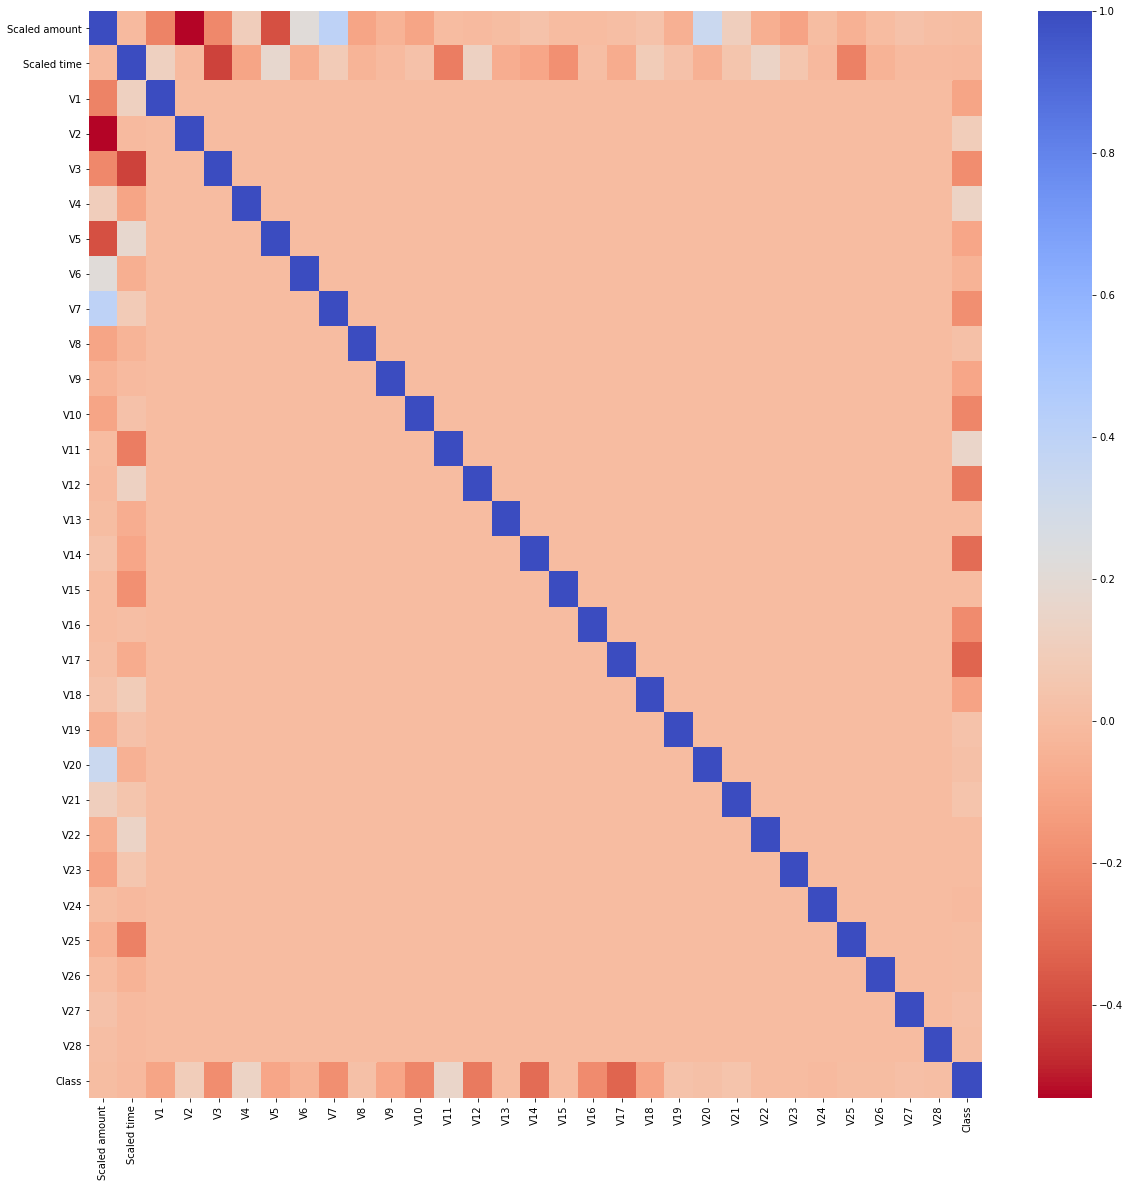

In [10]:
# The original dataframe
plt.figure(figsize = (20, 20))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm_r")

Let's visualize the correlation matrix of the undersample dataframe

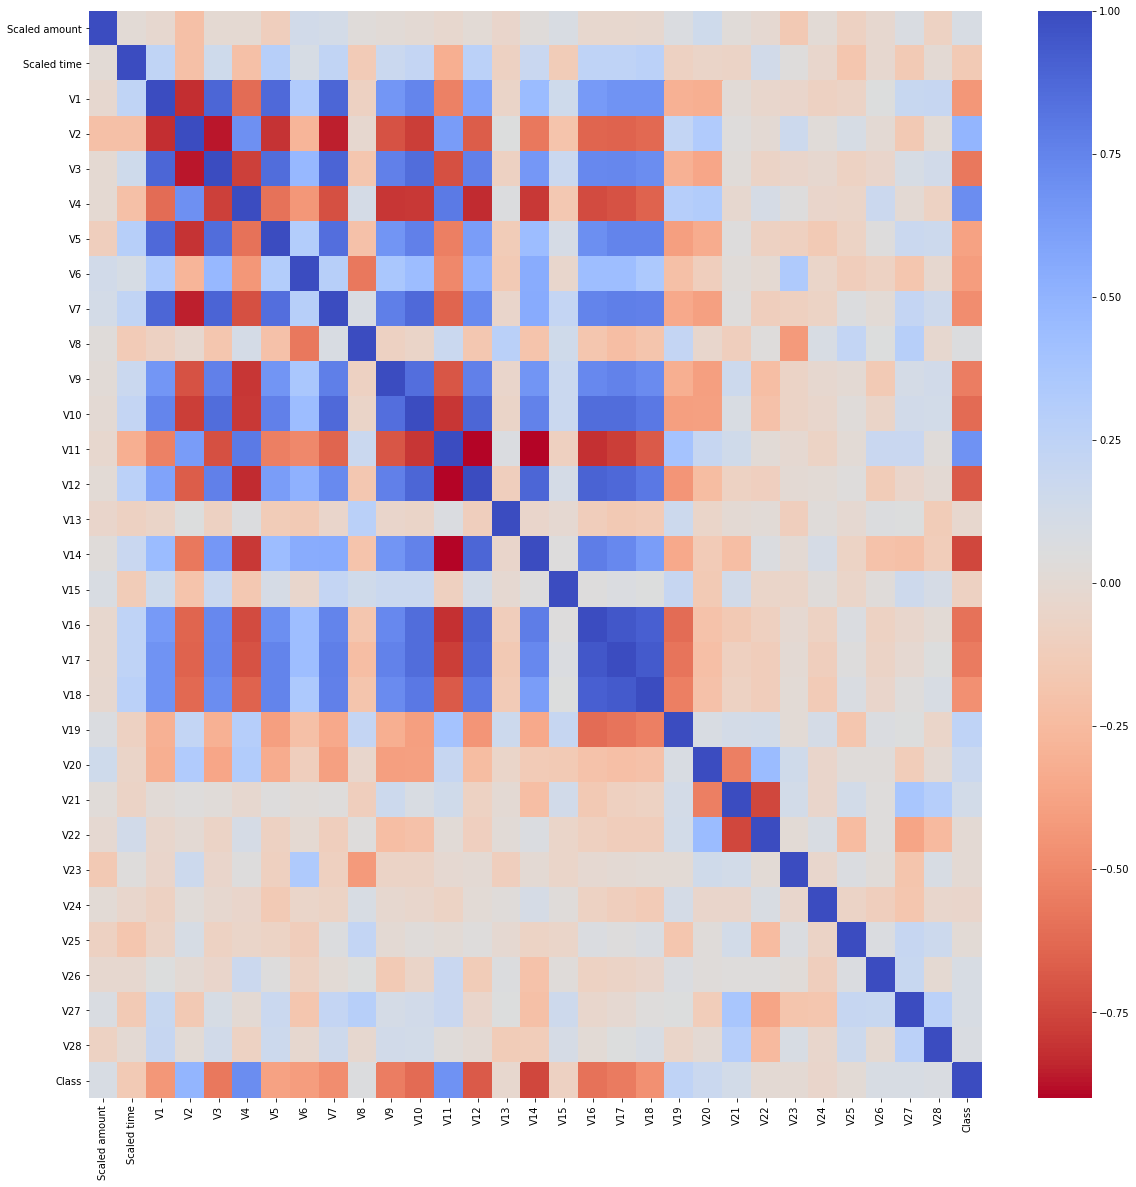

In [11]:
# The undersample dataframe
plt.figure(figsize = (20, 20))
corr = undersample_df.corr()
sns.heatmap(corr, cmap="coolwarm_r")

Look at the heat map of the correlation matrix of the **undersample_df** and answer the following questions:
<br>
**Question:** What are the top 3 features that have **positive** correlation with the **Class** feature (ignore the Class feature itself)?
<br>
**Answer:**
<br>
**Question:** What are the top 2 features that have **negative** correlation with the **Class** feature (ignore the Class feature itself)?
<br>
**Answer:**

### Visualizing the undersampling data
In this section we will use dimension reduction techniques like **PCA**, **t-NSE**, **truncated SVD** to reduce the undersampling data dimension to 2 and then plot the data. The details about **PCA**, **t-NSE**, **truncated SVD** algorithms are beyond the scope of this assignment. For now, you can just think of them as black boxes with the input is a dataset with n features and they reduce the dimension of the input dataset to k (k < n). In practice, we usually use them for visualizing to get a better sense of the data.
<br>
**Note**: Here are some usefull links about **t-NSE**, **truncated SVD**:
<br>
[StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)
<br>
[How to Calculate the SVD from Scratch with Python](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/)
<br>
[Truncated Singular Value Decomposition (SVD) using Amazon Food Reviews](https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d)

In [12]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X_undersample = undersample_df.drop("Class", axis=1)
y_undersample = undersample_df["Class"]

# PCA Implementation
X_undersample_reduced_pca = PCA(n_components=2, random_state=60).fit_transform(X_undersample.values)

# t-SNE Implementation
X_undersample_reduced_tsne = TSNE(n_components=2, random_state=60).fit_transform(X_undersample.values)

# TruncatedSVD Implementation
X_undersample_reduced_svd = TruncatedSVD(n_components=2, algorithm="randomized", random_state=60).fit_transform(X_undersample.values)

Let's use the reduced dimension data above and the **plot_cluster** below to visualize our undersampling data.

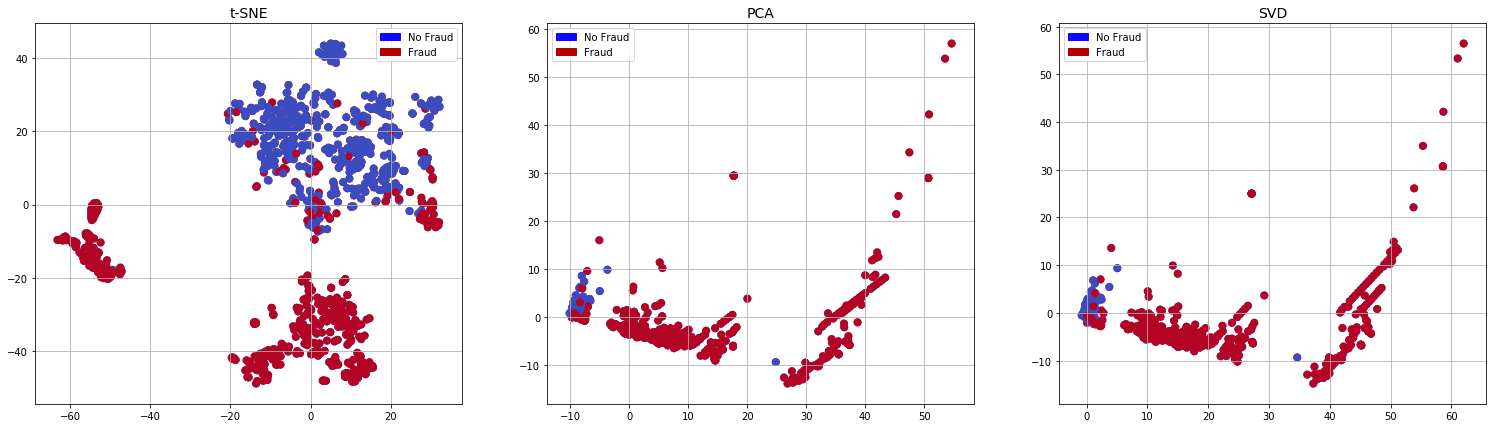

In [13]:
import matplotlib.patches as mpatches

def plot_cluster(X, y, ax, title):
    """
        Plot the reduced dimension data
        
        :param X: The reduced dimension data (Should contain only 2 features)
        :param y: The label (Should contain only 0s and 1s)
        :param ax: The axis from mathplotlib
        :param title: The title for the axis
        
        :return: None
    """
    blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
    red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

    ax.scatter(X[:,0], X[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax.set_title(title, fontsize=14)

    ax.grid(True)

    ax.legend(handles=[blue_patch, red_patch])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 7))

# t-SNE plot
plot_cluster(X_undersample_reduced_tsne, y_undersample, ax1, "t-SNE") # YOUR CODE HERE

# PCA plot
plot_cluster(X_undersample_reduced_pca, y_undersample, ax2, "PCA") # YOUR CODE HERE

# TruncatedSVD plot
plot_cluster(X_undersample_reduced_svd, y_undersample, ax3, "SVD") # YOUR CODE HERE
 
plt.show()

As you can see the random undersampling data is quite well seperate.

## Splitting the original data
Before we do cross-validation with random undersampling, SMOTE, class weight. Let's first split the original dataset into train, test datasets. We will do sampling, class weight on the train dataset to get new balanced datasets. Then we will train classifiers on those balanced datasets. The final results are evaluated on the test dataset without any sampling or class weight.
<br>
We use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn to split the data with the **stratify** parameter to make sure the train and test dataset have the same class ratio.

In [14]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

# We will do sampling, class weight on the train dataset
# and then train classifiers
X_train = X_train.values
y_train = y_train.values

# We evaluate on the test dataset without any sampling or class weight
X_test = X_test.values
y_test = y_test.values

Let's check the percentage of fraud and non-fraud examples in the **y_train**, **y_test**

In [15]:
count_labels(pd.DataFrame({"Class": y_train}))

# You should get
# Frauds: 394 - 0.17 %
# No Frauds: 227451 - 99.83 %

Frauds: 394 - 0.17 %
No Frauds: 227451 - 99.83 %


In [16]:
count_labels(pd.DataFrame({"Class": y_test}))

# You should get
# Frauds: 98 - 0.17 %
# No Frauds: 56864 - 99.83 %

Frauds: 98 - 0.17 %
No Frauds: 56864 - 99.83 %


## Cross-validation with random undersampling
In this section we will do cross-validation with random undersampling. We will not use the **undersample_df** above instead we will use the **[imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html)** library for undersampling and later for SMOTE. The **[imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html)** lib provides many features to deal with unbalanced datasets.

Let's first import some libs

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE

Below is an example using the **imbalanced-learn** lib to do random undersampling. The code is pretty self-explained.

In [18]:
random_sampler = RandomUnderSampler(sampling_strategy="majority", random_state=60)
X_train_undersampling, y_train_undersampling = random_sampler.fit_sample(X_train, y_train)

Let's check the class ratio again

In [19]:
count_labels(pd.DataFrame({"Class": y_train_undersampling}))

Frauds: 394 - 50.00 %
No Frauds: 394 - 50.00 %


Next, we will do cross-validation with random undersampling data. An important thing is that you should not split k-folds directly on the balanced dataset (the dataset after sampling). Why because you will be directly influencing the cross-validation fold test dataset before implementing cross-validation causing a "data leakage" problem. Instead, we will do sampling inside cross-validation. For more details about this you can check the links below:
<br>
[Proper Balancing for Cross Validation](https://towardsdatascience.com/proper-balancing-for-cross-validation-d95c17ff0ab4)
<br>
[
DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION](https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation)
<br>
[Joint use of over- and under-sampling techniques and cross-validation for the development and assessment of prediction models](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4634915/)

Let's create a [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to help us split the train dataset into k-folds. The nice thing about **StratifiedKFold** is that the folds are made by preserving the percentage of samples for each class.
<br>
Create a **StratifiedKFold** object with the following params:
- n_splits=5
- shuffle=False

In [20]:
sss = StratifiedKFold(n_splits=5, shuffle=False) # YOUR CODE HERE

Create a [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with the first parameter is a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) instance and the second parameter is the **log_reg_params** variable below. You can use different parameters to tune the **Logistic Regression** classifier if you want to.

In [21]:
log_reg_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

# Use the GridSearchCV and LogisticRegression classes
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params) # YOUR CODE HERE

Complete and run the cell below

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score


accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_idx, test_idx in sss.split(X_train, y_train):
    # sampling happens during cross-validation not before
    pipeline = make_pipeline(RandomUnderSampler(sampling_strategy="majority", random_state=66), grid_log_reg)
    model = pipeline.fit(X_train[train_idx], y_train[train_idx])
    best_est = grid_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test_idx])
    
    accuracies.append(model.score(X_train[test_idx], y_train[test_idx]))
    precisions.append(precision_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    recalls.append(recall_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    f1s.append(f1_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    aucs.append(roc_auc_score(y_train[test_idx], prediction)) # YOUR CODE HERE

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Let's check some metrics from cross-validation

In [23]:
print ("Average accuracy: {:.4f}".format(np.mean(accuracies)))
print ("Average precision: {:.4f}".format(np.mean(precisions)))
print ("Average recall: {:.4f}".format(np.mean(recalls)))
print ("Average f1: {:.4f}".format(np.mean(f1s)))
print ("Average auc: {:.4f}".format(np.mean(aucs)))

# You should get around (approximately)
# Average accuracy: 0.9726
# Average precision: 0.0559
# Average recall: 0.9085
# Average f1: 0.1051
# Average auc: 0.9406

Average accuracy: 0.9665
Average precision: 0.0465
Average recall: 0.9190
Average f1: 0.0884
Average auc: 0.9428


Let's check the best parameters after cross-validation

In [24]:
grid_log_reg.best_params_

{'C': 0.1}

Let's pick the best **Logistic Regression** instance after cross-validation

In [25]:
best_undersample_lg = grid_log_reg.best_estimator_

Let's train the best **Logistic Regression** instance with the full random undersampling above

In [26]:
# fit the X_train_undersampling, y_train_undersampling to the best_undersample_lg
# YOUR CODE HERE
best_undersample_lg.fit(X_train_undersampling, y_train_undersampling)

LogisticRegression(C=0.1)

Now, let's evaluate the model on the **X_test** dataset. Here we use the **AP (average precision)** metric, you can use the [average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) from sklearn to calculate the AP.

In [27]:
y_score = best_undersample_lg.decision_function(X_test)
average_precision_score(y_test, y_score)

# You should get about 0.6 - 0.8 because of randomness

0.5675955680788515

## Cross-validation with SMOTE (oversampling)

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. More information is retained since we didn't have to delete any rows unlike in random undersampling. Although it is likely that SMOTE will be more accurate than random undersampling, it will take more time to train since no rows are eliminated as previously stated. More about SMOTE:
<br>
[SMOTE explained for noobs](http://rikunert.com/SMOTE_explained)

Complete and run the cell below to do cross-validation with SMOTE on the **X_train**, **y_train**.
<br>
The code is very similar to the "random undersampling section". You will use the [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) class from the imbalanced-learn lib with the following parameters:
- sampling_strategy="minority"
- random_state=66 (for checking your score more easily)

In [28]:
log_reg_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

grid_log_reg_smote = GridSearchCV(LogisticRegression(), log_reg_params) # YOUR CODE HERE

accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_idx, test_idx in sss.split(X_train, y_train):
    # SMOTE happens during cross-validation not before
    # Use the SMOTE class here
    pipeline = make_pipeline(SMOTE(sampling_strategy="minority", random_state=66), grid_log_reg_smote) # YOUR CODE HERE
    model = pipeline.fit(X_train[train_idx], y_train[train_idx]) # YOUR CODE HERE
    best_est = grid_log_reg_smote.best_estimator_ # YOUR CODE HERE
    prediction = best_est.predict(X_train[test_idx]) # YOUR CODE HERE
    
    accuracies.append(model.score(X_train[test_idx], y_train[test_idx])) # YOUR CODE HERE
    precisions.append(precision_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    recalls.append(recall_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    f1s.append(f1_score(y_train[test_idx], prediction)) # YOUR CODE HERE
    aucs.append(roc_auc_score(y_train[test_idx], prediction)) # YOUR CODE HERE

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Let's see some metrics

In [29]:
print ("Average accuracy: {:.4f}".format(np.mean(accuracies)))
print ("Average precision: {:.4f}".format(np.mean(precisions)))
print ("Average recall: {:.4f}".format(np.mean(recalls)))
print ("Average f1: {:.4f}".format(np.mean(f1s)))
print ("Average auc: {:.4f}".format(np.mean(aucs)))

# You should get around (approximately)
# Average accuracy: 0.9763
# Average precision: 0.0590
# Average recall: 0.9264
# Average f1: 0.1110
# Average auc: 0.9504

Average accuracy: 0.9772
Average precision: 0.0660
Average recall: 0.9189
Average f1: 0.1231
Average auc: 0.9481


Let's use SMOTE on the **X_train**, **y_train**. Use **random_state=60**.

In [30]:
# SMOTE technique (oversampling) after splitting and Cross Validating
sm = SMOTE(sampling_strategy="minority", random_state=66) # YOUR CODE HERE

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train) # YOUR CODE HERE

Let's count the classes

In [31]:
count_labels(pd.DataFrame({"Class": y_train_sm}))

# You should get
# Frauds: 227451 - 50.00 %
# No Frauds: 227451 - 50.00 %

Frauds: 227451 - 50.00 %
No Frauds: 227451 - 50.00 %


Check the best params

In [32]:
# YOUR CODE HERE
grid_log_reg_smote.best_params_

{'C': 100.0}

Let's fit the best estimator with the full train datasets from SMOTE

In [33]:
t0 = time.time()

best_log_sm = grid_log_reg_smote.best_estimator_ # YOUR CODE HERE
# fit X_train_sm, y_train_sm to the best_log_sm
# YOUR CODE HERE

best_log_sm.fit(X_train_sm, y_train_sm)

t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :3.4014389514923096 sec


Evaluate on the **X_test** using AP

In [34]:
y_score = best_log_sm.decision_function(X_test)

# use the average_precision_score function
# YOUR CODE HERE
average_precision_score(y_test, y_score)

# You should get around 0.63 - 0.75 because of randomness

0.7609127573369743

## Class weighted / cost sensitive
Another way for dealing with unbalanced datasets is tweaking the cost function to make misclassification of minority instances more important than misclassification of majority instances. The weighting is applied to the loss so that smaller weight values result in a smaller error value, and in turn, less update to the model coefficients. A larger weight value results in a larger error calculation, and in turn, more update to the model coefficients. You can check the following links for more details:
<br>
[Practical tips for class imbalance in binary classification (see the 4. Class weighted / cost sensitive learning section)](https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7)
<br>
[Cost-Sensitive Logistic Regression for Imbalanced Classification](https://machinelearningmastery.com/cost-sensitive-logistic-regression/)

Let's use the [compute_class_weight](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) function from sklearn to compute the weight for each class.

In [35]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

class_weight
# You should get
# array([  0.50086612, 289.14340102])

array([  0.50086612, 289.14340102])

As you can see the weight for the fraud class is much higher than the non-fraud class so when learning, the model focuses more on the fraud class.

Now, let's use the **class_weight** with cross-validation

In [36]:
log_reg_params = {
    "C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
    "class_weight": [class_weight],
}

# create GridSearchCV with the log_reg_params above and cv=5
grid_log_reg_cw = GridSearchCV(LogisticRegression(class_weight=class_weight), log_reg_params, cv=5) # YOUR CODE HERE

grid_log_reg_cw.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-package

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight=array([  0.50086612, 289.14340102])),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0],
                         'class_weight': [array([  0.50086612, 289.14340102])]})

Check the best params

In [37]:
# YOUR CODE HERE
grid_log_reg_cw.best_params_

{'C': 10.0, 'class_weight': array([  0.50086612, 289.14340102])}

Get the best estimator from the **grid_log_reg_cw**.
<br>
NOTE: The best estimator has the **class_weight** in it

In [38]:
best_lg_reg_cw = grid_log_reg_cw.best_estimator_ # YOUR CODE HERE

best_lg_reg_cw.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0, class_weight=array([  0.50086612, 289.14340102]))

Evaluate on the **X_test**

In [39]:
y_score_cw = best_lg_reg_cw.decision_function(X_test) # YOUR CODE HERE

average_precision_score(y_test, y_score_cw)

# You should get around 0.63 - 0.75 because of randomness

0.7629537420620229

## Conclusion

In this assignment, we have explored methods to deal with unbalanced datasets. It is important for you to know about these methods so you can use them to tackle real-world unbalanced datasets.
<br>
Here we only use **Logistic Regression** to illustrate the idea. You encourage you to try more different algorithms like **Decision Tree**, **Neural Network**, ...
<br>